In [15]:
import cts
from tqdm.contrib.concurrent import process_map
import pandas as pd
from functools import partial
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
R = 0.01
n_simulations = 5
bootstrap_sample_size = 80000

df_main = pd.read_csv('top_10_full_random_men.csv')
df_main['weight'] = np.where(df_main['click'], 5, 1)
#optimal size for bootstrap sample: assuming 1/80 chance that each item is actually selected, and a minimum of 1000 steps, 80000 rows required each time

samples = [df_main.sample(bootstrap_sample_size, weights = 'weight').drop(['weight'], axis = 1) for i in range(n_simulations)]
partial_func = partial(cts.ctr_simulator, K_arms = 34, d = 65, R = R)
results = []
    
for i in range(n_simulations):
    results.append(partial_func(samples[i]))

80000it [1:09:14, 19.26it/s]
80000it [1:10:05, 19.02it/s]
16850it [14:50, 14.24it/s]

0


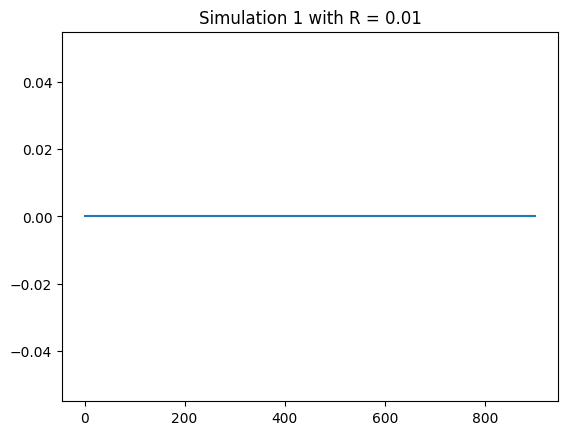

0


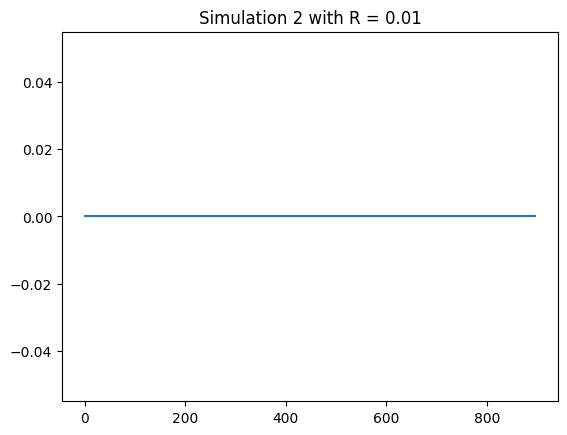

0


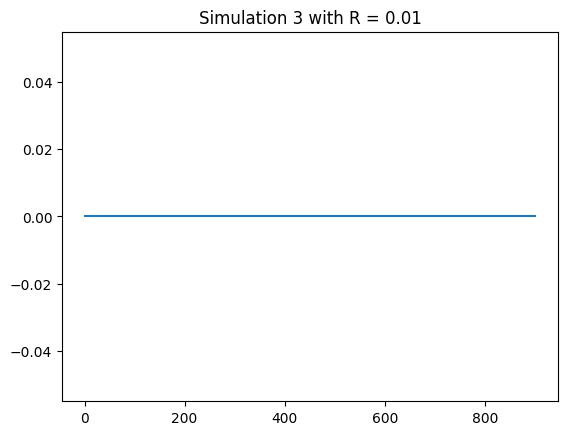

0


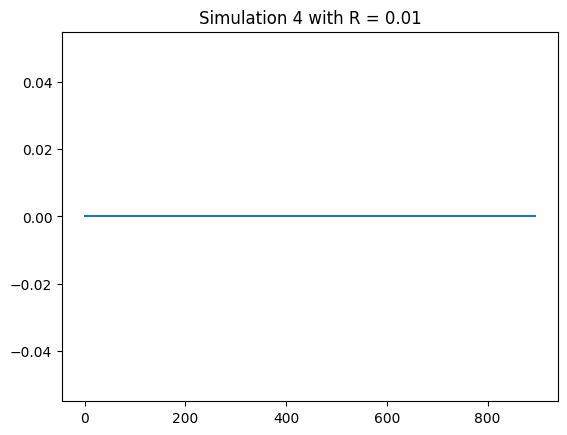

0


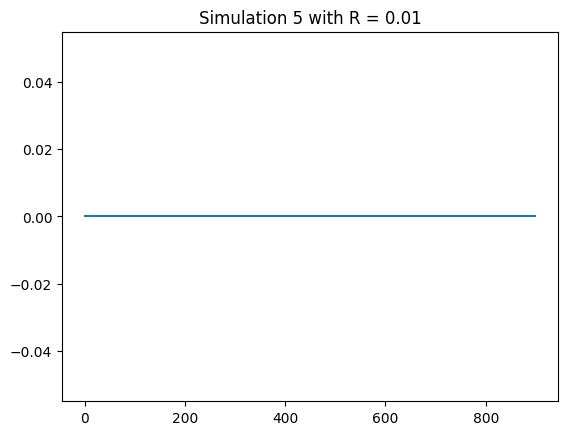

0


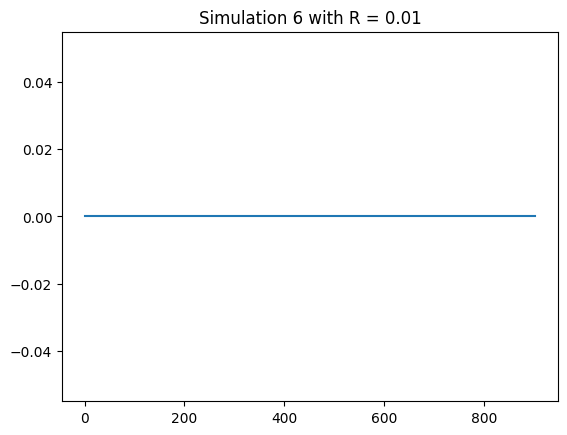

0


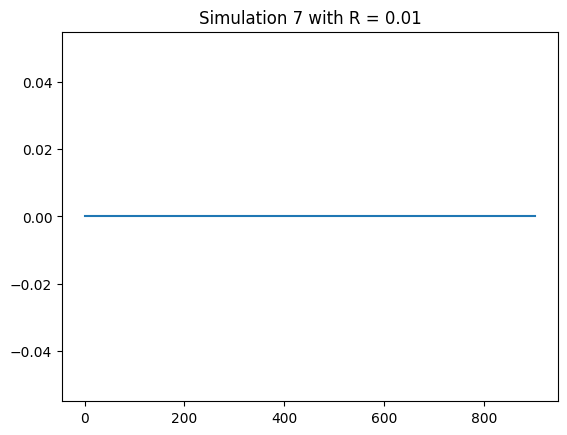

0


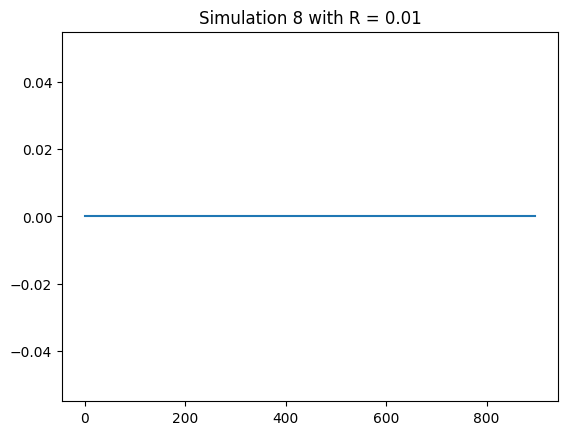

0


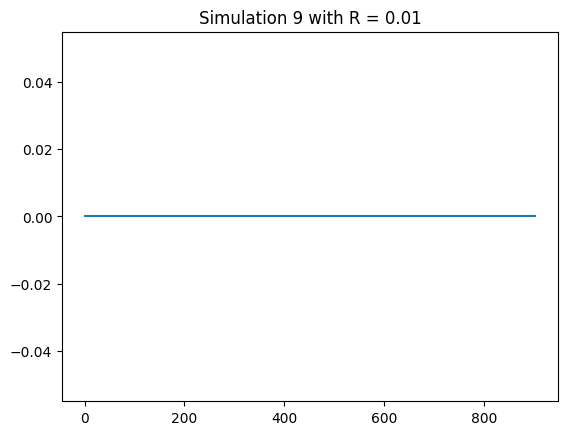

0


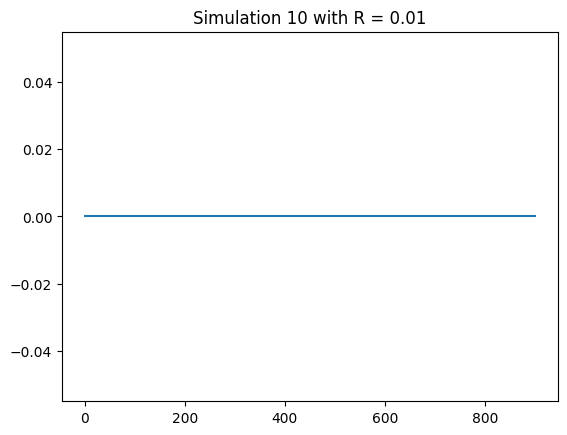

In [25]:
for i in range(n_simulations):
    aligned_time_steps, cum_rewards, aligned_ctr, policy = results[i]
    print(cum_rewards)
    plt.plot(aligned_ctr)
    plt.title("Simulation "+str(i+1)+" with R = "+str(R))
    plt.show()

In [2]:
R = 0.05
n_simulations = 1
bootstrap_sample_size = 80000

df_main = pd.read_csv('full_random_men.csv')
#optimal size for bootstrap sample: assuming 1/80 chance that each item is actually selected, and a minimum of 1000 steps, 80000 rows required each time

aligned_time_steps, cum_rewards, aligned_ctr, policy = cts.ctr_simulator(K_arms = 34, d = 65, R = R, df = df_main.sample(bootstrap_sample_size))

80000it [1:10:05, 19.02it/s]


Text(0.5, 1.0, 'R = 0.05')

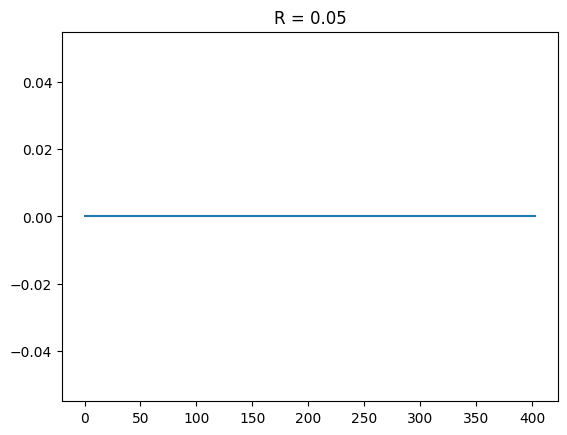

In [5]:
plt.plot(aligned_ctr)
plt.title("R = "+str(R))